## Is <font color='red'>Full</font> Lockdown effective in controlling the spread of Covid 19?

#### I will be using 2 datasets from ACAPS COVID-19: Government Measures Dataset and OXFORD COVID-19 GOVERNMENT RESPONSE TRACKER to explore the effectiveness of <font color='red'>Full</font> Lockdown in controlling the spread of Covid 19.
https://data.humdata.org/dataset/acaps-covid19-government-measures-dataset

https://www.bsg.ox.ac.uk/research/research-projects/oxford-covid-19-government-response-tracker 



#### 1) Background Understanding and Analysis Questions:
    1. What are the major actions taken by different Country in the world in dealing with Covid-19?
    2. Which country implemented Full Lockdown and which does not?
    3. Why Italy and Spain have high accumulated confirmed cases even with Full Lockdown?
    4. Is Full Lockdown help in flattening the curve from the spike of Covid?
    5. How about countries that do not implement Full Lockdown?


#### 2) Data Understanding and Analysis:
First, lets have a quick look into the 2 datasets.


In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Read the datasets
pd.pandas.set_option('display.max_columns', None)
df_ACAPSCovid19 = pd.read_excel('20200407-acaps-covid-19-goverment-measures-dataset-v5.xlsx', sheet_name='Database')
df_OxfordCovid19 = pd.read_csv('OxCGRT_Download_090420_074921_Full.csv')


### The reason we are using ACAPSCovid dataset for the types of actinon taken by Government is because ACAPSCovid dataset make a differentiation on Lockdown from Movement Restriction which the Oxford Covid dataset lump together this two category. But we would be using Oxford Covid dataset to assess the numbers of Covid 19 confirmed cases 





In [3]:
df_ACAPSCovid19.head()

,ID,COUNTRY,ISO,ADMIN_LEVEL_NAME,PCODE,REGION,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Public health measures,Introduction of quarantine policies,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
2,3,Afghanistan,AFG,NaN,NaN,Asia,Public health measures,Awareness campaigns,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
3,4,Afghanistan,AFG,NaN,NaN,Asia,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
4,5,Afghanistan,AFG,NaN,NaN,Asia,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,2020-03-12,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,2020-03-14,NaN


In [4]:
df_OxfordCovid19.head()

,CountryName,CountryCode,Date,S1_School closing,S1_IsGeneral,S1_Notes,S2_Workplace closing,S2_IsGeneral,S2_Notes,S3_Cancel public events,S3_IsGeneral,S3_Notes,S4_Close public transport,S4_IsGeneral,S4_Notes,S5_Public information campaigns,S5_IsGeneral,S5_Notes,S6_Restrictions on internal movement,S6_IsGeneral,S6_Notes,S7_International travel controls,S7_Notes,S8_Fiscal measures,S8_Notes,S9_Monetary measures,S9_Notes,S10_Emergency investment in health care,S10_Notes,S11_Investment in Vaccines,S11_Notes,S12_Testing framework,S12_Notes,S13_Contact tracing,S13_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39
0,Aruba,ABW,20200101,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t
1,Aruba,ABW,20200102,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t
2,Aruba,ABW,20200103,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t
3,Aruba,ABW,20200104,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t
4,Aruba,ABW,20200105,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t


## 1) What are the major actions taken by different Country in the world in dealing Covid-19?


In [5]:
#Visualize Data
def plot_chart(df, col, title):
    '''
    Plot chart 
    '''
    plt.figure(figsize=(8,6))
    plt.ylabel("Percentage")
    XCol = df[col].value_counts()
    (XCol/df.shape[0]).plot(kind="bar");
    
    plt.title(title);
    

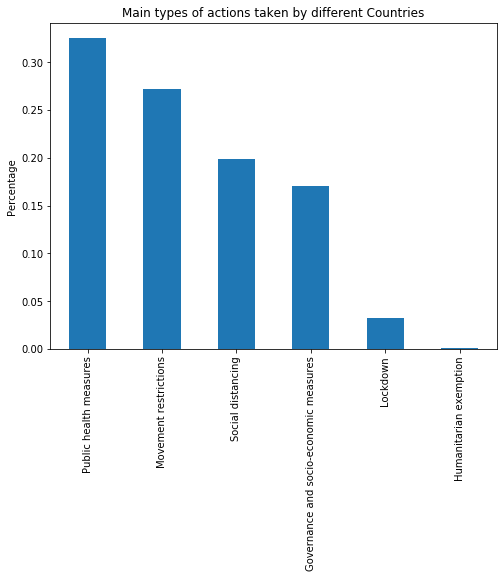

In [6]:
df_ACAPSCovid19['CATEGORY'].value_counts()

plot_chart(df_ACAPSCovid19, 'CATEGORY', 'Main types of actions taken by different Countries')

### As we can see from the above, ACAPSCovid19 datasets classified 6 main types of actions taken by different country:
<li> a) Public health measures </li>
<li> b) Movement restrictions </li>
<li> c) Social Distancing </li>
<li> d) Governance and socio-economic measures </li>
<li> <b> e) Lockdown </b> </li>
<li> f) Humanitarian exemption </li> 

And I'm going to get the list of country which implemented Full Lockdown and match the list to OxfordCovid19 dataset which contained the number of ConfirmedCases to assess the trend of cases before and after Full Lockdown.

In [7]:
print('Total rows: ', df_ACAPSCovid19.shape[0], '\n')

print(df_ACAPSCovid19.dtypes)

Total rows:  4149 

ID                             int64
COUNTRY                       object
ISO                           object
ADMIN_LEVEL_NAME              object
PCODE                        float64
REGION                        object
CATEGORY                      object
MEASURE                       object
TARGETED_POP_GROUP            object
COMMENTS                      object
NON_COMPLIANCE                object
DATE_IMPLEMENTED      datetime64[ns]
SOURCE                        object
SOURCE_TYPE                   object
LINK                          object
ENTRY_DATE            datetime64[ns]
Alternative source            object
dtype: object


In [8]:
print('Total rows:', df_OxfordCovid19.shape[0], '\n')

print(df_OxfordCovid19.dtypes)

Total rows: 12659 

CountryName                                 object
CountryCode                                 object
Date                                         int64
S1_School closing                          float64
S1_IsGeneral                               float64
S1_Notes                                    object
S2_Workplace closing                       float64
S2_IsGeneral                               float64
S2_Notes                                    object
S3_Cancel public events                    float64
S3_IsGeneral                               float64
S3_Notes                                    object
S4_Close public transport                  float64
S4_IsGeneral                               float64
S4_Notes                                    object
S5_Public information campaigns            float64
S5_IsGeneral                               float64
S5_Notes                                    object
S6_Restrictions on internal movement       float64
S6_IsGenera

## Data Preparation

Prepare the data for joining and analysis


In [9]:
#Convert Date column from numeric to Datetime
df_OxfordCovid19['DATE'] = pd.to_datetime(df_OxfordCovid19['Date'], format='%Y%m%d')
df_OxfordCovid19.head()

,CountryName,CountryCode,Date,S1_School closing,S1_IsGeneral,S1_Notes,S2_Workplace closing,S2_IsGeneral,S2_Notes,S3_Cancel public events,S3_IsGeneral,S3_Notes,S4_Close public transport,S4_IsGeneral,S4_Notes,S5_Public information campaigns,S5_IsGeneral,S5_Notes,S6_Restrictions on internal movement,S6_IsGeneral,S6_Notes,S7_International travel controls,S7_Notes,S8_Fiscal measures,S8_Notes,S9_Monetary measures,S9_Notes,S10_Emergency investment in health care,S10_Notes,S11_Investment in Vaccines,S11_Notes,S12_Testing framework,S12_Notes,S13_Contact tracing,S13_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39,DATE
0,Aruba,ABW,20200101,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t,2020-01-01
1,Aruba,ABW,20200102,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t,2020-01-02
2,Aruba,ABW,20200103,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t,2020-01-03
3,Aruba,ABW,20200104,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t,2020-01-04
4,Aruba,ABW,20200105,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,\t,2020-01-05


In [10]:
#Rename column from ISO to CountryCode to match the CountryCode Column in OxfordCovid19 dataset 
df_ACAPSCovid19.rename(columns={'ISO': 'CountryCode'}, inplace=True)
df_ACAPSCovid19.head()

,ID,COUNTRY,CountryCode,ADMIN_LEVEL_NAME,PCODE,REGION,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,1,Afghanistan,AFG,NaN,NaN,Asia,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
1,2,Afghanistan,AFG,Kabul,NaN,Asia,Public health measures,Introduction of quarantine policies,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
2,3,Afghanistan,AFG,NaN,NaN,Asia,Public health measures,Awareness campaigns,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
3,4,Afghanistan,AFG,NaN,NaN,Asia,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14,NaN
4,5,Afghanistan,AFG,NaN,NaN,Asia,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,2020-03-12,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,2020-03-14,NaN


In [11]:
#Provide a set of columns with more than 50%% of the values missing
most_missing_cols = set(df_OxfordCovid19.columns[df_OxfordCovid19.isnull().mean() > 0.5])
print (list(most_missing_cols))


['S13_Notes', 'S12_Notes', 'S6_IsGeneral', 'S1_IsGeneral', 'S5_Notes', 'S8_Notes', 'S3_Notes', 'S7_Notes', 'S9_Notes', 'S10_Notes', 'S2_IsGeneral', 'S4_Notes', 'S11_Notes', 'S3_IsGeneral', 'S6_Notes', 'S4_IsGeneral', 'S2_Notes', 'S1_Notes']


In [12]:
#Drop the most_missing_cols from the datasets
df_OxfordCovid19.drop(list(most_missing_cols), axis=1, inplace=True)
df_OxfordCovid19.head()

,CountryName,CountryCode,Date,S1_School closing,S2_Workplace closing,S3_Cancel public events,S4_Close public transport,S5_Public information campaigns,S5_IsGeneral,S6_Restrictions on internal movement,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39,DATE
0,Aruba,ABW,20200101,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t,2020-01-01
1,Aruba,ABW,20200102,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t,2020-01-02
2,Aruba,ABW,20200103,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t,2020-01-03
3,Aruba,ABW,20200104,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t,2020-01-04
4,Aruba,ABW,20200105,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t,2020-01-05


In [13]:
#Provide a set of columns with more than 50% of the values missing
most_missing_cols = set(df_ACAPSCovid19.columns[df_ACAPSCovid19.isnull().mean() > 0.5])
print (most_missing_cols)

{'PCODE', 'Alternative source', 'ADMIN_LEVEL_NAME'}


In [14]:
#Drop the most_missing_cols from the datasets
df_ACAPSCovid19.drop(list(most_missing_cols), axis=1, inplace=True)
df_ACAPSCovid19.head()

,ID,COUNTRY,CountryCode,REGION,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE
0,1,Afghanistan,AFG,Asia,Public health measures,Health screenings in airports and border cross...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14
1,2,Afghanistan,AFG,Asia,Public health measures,Introduction of quarantine policies,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14
2,3,Afghanistan,AFG,Asia,Public health measures,Awareness campaigns,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14
3,4,Afghanistan,AFG,Asia,Governance and socio-economic measures,Emergency administrative structures activated ...,No,NaN,NaN,2020-02-12,Ministry of Health,Government,https://moph.gov.af/en/moph-held-emergency-mee...,2020-03-14
4,5,Afghanistan,AFG,Asia,Social distancing,Limit public gatherings,No,Nevruz festival cancelled,NaN,2020-03-12,AA,Media,https://www.aa.com.tr/en/asia-pacific/coronavi...,2020-03-14


In [15]:
# Select columns that useful for our analysis from df_ACAPSCovid19:

interested_columns = ['COUNTRY', 'CountryCode', 'REGION', 'CATEGORY', 'MEASURE', 'COMMENTS', 'DATE_IMPLEMENTED']

df_ACAPSCovid19 = df_ACAPSCovid19[interested_columns]
df_ACAPSCovid19.head()


,COUNTRY,CountryCode,REGION,CATEGORY,MEASURE,COMMENTS,DATE_IMPLEMENTED
0,Afghanistan,AFG,Asia,Public health measures,Health screenings in airports and border cross...,NaN,2020-02-12
1,Afghanistan,AFG,Asia,Public health measures,Introduction of quarantine policies,NaN,2020-02-12
2,Afghanistan,AFG,Asia,Public health measures,Awareness campaigns,NaN,2020-02-12
3,Afghanistan,AFG,Asia,Governance and socio-economic measures,Emergency administrative structures activated ...,NaN,2020-02-12
4,Afghanistan,AFG,Asia,Social distancing,Limit public gatherings,Nevruz festival cancelled,2020-03-12


### ACAPSCovid19 datasets further classified different types of Lockdown. But we are interested on Full Lockdown segments 

In [16]:
df_ACAPSCovid19.query("CATEGORY == 'Lockdown'")['MEASURE'].value_counts()

Partial lockdown                                     110
Full lockdown                                         20
Lockdown of refugee/idp camps or other minorities      6
Name: MEASURE, dtype: int64

In [17]:
# This analysis only focus on the effect of Full Lockdown. 
# Hence, we will be getting list of country that implemented Full Lockdown

LockdownCountry = df_ACAPSCovid19.query("CATEGORY == 'Lockdown' and (MEASURE == 'Full lockdown' )")['CountryCode'].unique()
dfLockdownCountry = pd.DataFrame(LockdownCountry , columns=["CountryCode"])
dfLockdownCountry

,CountryCode
0,AUT
1,ERI
2,GEO
3,HND
4,IRQ
5,ITA
6,LBY
7,MYS
8,MDA
9,NPL


### As mentioend earlier, I'm going to get the list of country which implemented Full Lockdown and match the list to OxfordCovid19 dataset which contained the number of ConfirmedCases to assess the trend of cases before and after Full Lockdown.
### We noticed that there are 15 countries that implemented Full Lockdown accoding to ACAPSCovid19 datastes. However, OxfordCovid19 dataset appeared does not recorded 5 of those countries. So we will only have 10 countries to assess the trend of cases on the before and after Full Lockdown


In [18]:
# Number of countries in OxfordCovid19 dataset that have implemented Full Lockdown
CountryList = set(df_OxfordCovid19['CountryCode']).intersection(set(dfLockdownCountry['CountryCode']))
len(CountryList)


10

In [19]:
# Split the OxfordCovid19 dataset for Countries that do not adopt Full Lockdown

df_OxfordCovid19_NotLockdownC = df_OxfordCovid19[~df_OxfordCovid19['CountryCode'].isin(dfLockdownCountry['CountryCode'])]
#df_OxfordCovid19_NotLockdownC.head()


In [20]:
# Split the OxfordCovid19 dataset for Countries that have adopted Full Lockdown

df_OxfordCovid19_LockdownC = df_OxfordCovid19[df_OxfordCovid19['CountryCode'].isin(dfLockdownCountry['CountryCode'])]
#df_OxfordCovid19_LockdownC

## 2. Which country implemented Full Lockdown and which does not?

### Lets have a glimpse on the Country that does not adopt Full Lockdown

In [21]:
# Countries that do not adopt Full Lockdown sort by top number of Confirmed Cases

df_OxfordCovid19_NotLockdownC.sort_values('ConfirmedCases',ascending = False).groupby('CountryCode').head(1)[:10]

,CountryName,CountryCode,Date,S1_School closing,S2_Workplace closing,S3_Cancel public events,S4_Close public transport,S5_Public information campaigns,S5_IsGeneral,S6_Restrictions on internal movement,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39,DATE
11921,United States,USA,20200408,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398809.0,12895.0,NaN,66.67,\t,2020-04-08
3247,Germany,DEU,20200408,2.0,1.0,2.0,0.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,103228.0,1861.0,80.95,80.95,\t,2020-04-08
2530,China,CHN,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82784.0,3337.0,NaN,66.67,\t,2020-04-08
4093,France,FRA,20200408,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,78167.0,10328.0,95.24,95.24,\t,2020-04-08
5433,Iran,IRN,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,62589.0,3872.0,NaN,71.43,\t,2020-04-08
4192,United Kingdom,GBR,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55242.0,6159.0,NaN,71.43,\t,2020-04-08
11406,Turkey,TUR,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34109.0,725.0,NaN,95.24,\t,2020-04-08
1022,Belgium,BEL,20200408,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22194.0,2035.0,NaN,85.71,\t,2020-04-08
8239,Netherlands,NLD,20200408,2.0,2.0,2.0,0.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,19580.0,2101.0,85.71,85.71,\t,2020-04-08
2229,Canada,CAN,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17883.0,380.0,NaN,80.95,\t,2020-04-08


In [22]:
df_OxfordCovid19_NotLockdownC.set_index('CountryName', inplace=True)


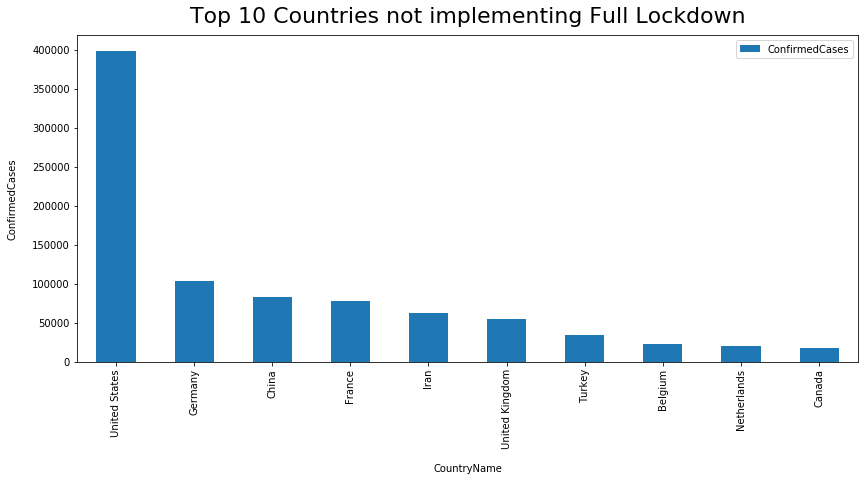

In [23]:
#Plot a chart

df_OxfordCovid19_NotLockdownC.sort_values('ConfirmedCases',ascending = False).groupby('CountryName')['ConfirmedCases'].head(1)[:10].plot(legend=True, figsize=(14, 6), kind='bar')

plt.xlabel("CountryName", labelpad=15)
plt.ylabel("ConfirmedCases", labelpad=15)
plt.title("Top 10 Countries not implementing Full Lockdown", y=1.02, fontsize=22);

### Lets take a look on the Countries that adopted Full Lockdown

In [24]:
# Countries that have adopted Full Lockdown sort by top number of Confirmed Cases

df_OxfordCovid19_LockdownC.sort_values('ConfirmedCases',ascending = False).groupby('CountryCode').head(1)[:10]

,CountryName,CountryCode,Date,S1_School closing,S2_Workplace closing,S3_Cancel public events,S4_Close public transport,S5_Public information campaigns,S5_IsGeneral,S6_Restrictions on internal movement,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39,DATE
3865,Spain,ESP,20200408,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,0.0,0.00,0.0,0.0,1.0,1.0,140510.0,13798.0,95.24,95.24,\t,2020-04-08
5843,Italy,ITA,20200408,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,135586.0,17129.0,NaN,95.24,\t,2020-04-08
2328,Switzerland,CHE,20200408,2.0,2.0,2.0,0.0,1.0,1.0,1.0,3.0,0.0,-0.75,0.0,0.0,1.0,1.0,22164.0,641.0,80.95,80.95,\t,2020-04-08
816,Austria,AUT,20200408,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,0.0,0.00,0.0,0.0,2.0,2.0,12640.0,243.0,95.24,95.24,\t,2020-04-08
7936,Malaysia,MYS,20200408,2.0,2.0,2.0,0.0,1.0,1.0,2.0,3.0,NaN,2.50,NaN,NaN,NaN,NaN,3963.0,63.0,85.71,85.71,\t,2020-04-08
8939,Philippines,PHL,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3764.0,177.0,NaN,90.48,\t,2020-04-08
12349,South Africa,ZAF,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1749.0,13.0,NaN,100.00,\t,2020-04-08
5532,Iraq,IRQ,20200408,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1031.0,64.0,NaN,90.48,\t,2020-04-08
4819,Honduras,HND,20200408,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,4.50,0.0,0.0,1.0,NaN,312.0,22.0,100.00,100.00,\t,2020-04-08
6691,Sri Lanka,LKA,20200408,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,6.00,0.0,0.0,2.0,2.0,185.0,6.0,100.00,100.00,\t,2020-04-08


In [25]:
df_OxfordCovid19_LockdownC.set_index('CountryName', inplace=True)

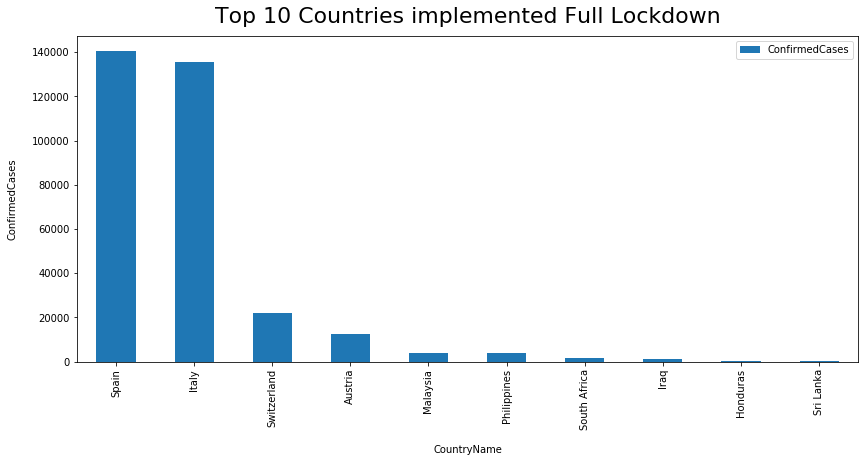

In [26]:
#Plot a chart
df_OxfordCovid19_LockdownC.sort_values('ConfirmedCases',ascending = False).groupby('CountryName')['ConfirmedCases'].head(1)[:10].plot(legend=True, figsize=(14, 6),  kind='bar')

plt.xlabel("CountryName", labelpad=15)
plt.ylabel("ConfirmedCases", labelpad=15)
plt.title("Top 10 Countries implemented Full Lockdown", y=1.02, fontsize=22);

### From the Pareto, it appeared that top 10 Countries (except Spain & Italy) that implemented Full Lockdown have lower accumulated Confirmed Cases as compared to the top 10 Country that does not implement Full Lockdown. So the question to be asked would be: 

## 3) Why Italy and Spain have high accumulated confirmed cases even with Full Lockdown?



### Lets take a look at which point of time each Country enforced Full Lockdown. 

In [27]:
# Select the country with Full Lockdown implemented sort by Implementation Date 

df_Lockdown = df_ACAPSCovid19.query("CATEGORY == 'Lockdown' and (MEASURE == 'Full lockdown')")[['CountryCode','COUNTRY', 'CATEGORY', 'MEASURE', 'COMMENTS', 'DATE_IMPLEMENTED']].sort_values(['CountryCode', 'DATE_IMPLEMENTED'],ascending = [True, True])
df_Lockdown


,CountryCode,COUNTRY,CATEGORY,MEASURE,COMMENTS,DATE_IMPLEMENTED
245,AUT,Austria,Lockdown,Full lockdown,Two villages: Nenzing-Dorf und Beschling under...,2020-03-22
3727,CHE,Switzerland,Lockdown,Full lockdown,"The closure of all non-essential work, includi...",2020-03-23
1173,ERI,Eritrea,Lockdown,Full lockdown,All citizens are compelled to stay at home for...,2020-04-02
3526,ESP,Spain,Lockdown,Full lockdown,Some villages,2020-03-13
3560,ESP,Spain,Lockdown,Full lockdown,Country-wide lock-down with only essential wor...,2020-03-28
1418,GEO,Georgia,Lockdown,Full lockdown,Nationwide lockdown,2020-03-30
1603,HND,Honduras,Lockdown,Full lockdown,"From April 6 – 12, all municipalities in the D...",2020-04-06
1804,IRQ,Iraq,Lockdown,Full lockdown,Imposition of complete lockdown across the Kur...,2020-04-04
1911,ITA,Italy,Lockdown,Full lockdown,All regions at risk (specifically defined) nee...,2020-02-23
1900,ITA,Italy,Lockdown,Full lockdown,All production will be closed and strictly onl...,2020-03-23


### Looking at the comments field of the dataset, it appeared that even full lockdown also implemented with different degree in the same country and getting stringent progressively. For instance, Spain Full Lockdown on Mar13 were on some villages only and enforced to Country-wide on Mar-28.    
### Hence, to ease analysis, I'm going to take the last implemented date for a particular country as the last most effective date of a Full Lockdown. 

In [28]:
df_Lockdown = df_Lockdown.sort_values('DATE_IMPLEMENTED',ascending = False).groupby('CountryCode').head(1)

# We does not need the comments column anymore since we have determinted the last implemented date for the highest stringent Full Lockdown for a  country. 
df_Lockdown = df_Lockdown[['CountryCode','COUNTRY', 'CATEGORY', 'MEASURE','DATE_IMPLEMENTED']].sort_values(['CountryCode', 'DATE_IMPLEMENTED'],ascending = [True, True])

df_Lockdown

,CountryCode,COUNTRY,CATEGORY,MEASURE,DATE_IMPLEMENTED
245,AUT,Austria,Lockdown,Full lockdown,2020-03-22
3727,CHE,Switzerland,Lockdown,Full lockdown,2020-03-23
1173,ERI,Eritrea,Lockdown,Full lockdown,2020-04-02
3560,ESP,Spain,Lockdown,Full lockdown,2020-03-28
1418,GEO,Georgia,Lockdown,Full lockdown,2020-03-30
1603,HND,Honduras,Lockdown,Full lockdown,2020-04-06
1804,IRQ,Iraq,Lockdown,Full lockdown,2020-04-04
1900,ITA,Italy,Lockdown,Full lockdown,2020-03-23
2212,LBY,Libya,Lockdown,Full lockdown,2020-03-29
3667,LKA,Sri Lanka,Lockdown,Full lockdown,2020-04-06


In [29]:
df_Covid19_Lockdown = df_OxfordCovid19_LockdownC.copy()

# Copy of dataset with number of confirmed cases each day
df_Covid19_Lockdown.head()

,CountryCode,Date,S1_School closing,S2_Workplace closing,S3_Cancel public events,S4_Close public transport,S5_Public information campaigns,S5_IsGeneral,S6_Restrictions on internal movement,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39,DATE
CountryName,,,,,,,,,,,,,,,,,,,,,,
Austria,AUT,20200101,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-01
Austria,AUT,20200102,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-02
Austria,AUT,20200103,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-03
Austria,AUT,20200104,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-04
Austria,AUT,20200105,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-05


### We will create a new column called [NewConfirmed] to record the daily new cases which we will derived from [ConfirmedCases] which is a daily accumulated number.

In [30]:
df_Covid19_Lockdown['NewConfirmed'] = df_Covid19_Lockdown.groupby('CountryCode')['ConfirmedCases'].diff()

df_Covid19_Lockdown.tail()

,CountryCode,Date,S1_School closing,S2_Workplace closing,S3_Cancel public events,S4_Close public transport,S5_Public information campaigns,S5_IsGeneral,S6_Restrictions on internal movement,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39,DATE,NewConfirmed
CountryName,,,,,,,,,,,,,,,,,,,,,,,
South Africa,ZAF,20200404,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,5.25,0.0,0.0,3.0,2.0,1505.0,7.0,100.0,100.0,\t,2020-04-04,43.0
South Africa,ZAF,20200405,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,5.25,0.0,0.0,3.0,2.0,1585.0,9.0,100.0,100.0,\t,2020-04-05,80.0
South Africa,ZAF,20200406,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,5.25,0.0,0.0,3.0,2.0,1655.0,11.0,100.0,100.0,\t,2020-04-06,70.0
South Africa,ZAF,20200407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1686.0,12.0,NaN,100.0,\t,2020-04-07,31.0
South Africa,ZAF,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1749.0,13.0,NaN,100.0,\t,2020-04-08,63.0


### Merge the 2 dataframe on Country which implemented Full Lockdown 

In [31]:
df_Covid19 = pd.merge(df_Covid19_Lockdown, df_Lockdown, how='left', on=['CountryCode'])
df_Covid19.head()

,CountryCode,Date,S1_School closing,S2_Workplace closing,S3_Cancel public events,S4_Close public transport,S5_Public information campaigns,S5_IsGeneral,S6_Restrictions on internal movement,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39,DATE,NewConfirmed,COUNTRY,CATEGORY,MEASURE,DATE_IMPLEMENTED
0,AUT,20200101,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-01,NaN,Austria,Lockdown,Full lockdown,2020-03-22
1,AUT,20200102,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-02,0.0,Austria,Lockdown,Full lockdown,2020-03-22
2,AUT,20200103,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-03,0.0,Austria,Lockdown,Full lockdown,2020-03-22
3,AUT,20200104,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-04,0.0,Austria,Lockdown,Full lockdown,2020-03-22
4,AUT,20200105,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-05,0.0,Austria,Lockdown,Full lockdown,2020-03-22


In [32]:
df_Covid19['NewConfirmed'].isnull().mean()

0.223069590085796

In [33]:
# Drop the rows with NaN on NewConfirmed 
df_Covid19 = df_Covid19.dropna(subset=['NewConfirmed'],  how='any')
df_Covid19.head()

,CountryCode,Date,S1_School closing,S2_Workplace closing,S3_Cancel public events,S4_Close public transport,S5_Public information campaigns,S5_IsGeneral,S6_Restrictions on internal movement,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39,DATE,NewConfirmed,COUNTRY,CATEGORY,MEASURE,DATE_IMPLEMENTED
1,AUT,20200102,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-02,0.0,Austria,Lockdown,Full lockdown,2020-03-22
2,AUT,20200103,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-03,0.0,Austria,Lockdown,Full lockdown,2020-03-22
3,AUT,20200104,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-04,0.0,Austria,Lockdown,Full lockdown,2020-03-22
4,AUT,20200105,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-05,0.0,Austria,Lockdown,Full lockdown,2020-03-22
5,AUT,20200106,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,\t,2020-01-06,0.0,Austria,Lockdown,Full lockdown,2020-03-22


In [34]:
df_Covid19['NewConfirmed'].isnull().mean()

0.0

### Lets see the number of accumulated cases up to the point before the Country decided to implement Full Lockdown

In [35]:
df1 = df_Covid19.query("DATE == DATE_IMPLEMENTED")[['COUNTRY', 'DATE_IMPLEMENTED', 'ConfirmedCases']].sort_values(['ConfirmedCases'],ascending =False).copy()
df1.rename(columns={'DATE_IMPLEMENTED': 'DATE'}, inplace=True)
df1['Cases'] = 'AccumulatedCases_BeforeLockdown'
df1


,COUNTRY,DATE,ConfirmedCases,Cases
293,Spain,2020-03-28,64059.0,AccumulatedCases_BeforeLockdown
618,Italy,2020-03-23,59138.0,AccumulatedCases_BeforeLockdown
189,Switzerland,2020-03-23,6971.0,AccumulatedCases_BeforeLockdown
81,Austria,2020-03-22,3024.0,AccumulatedCases_BeforeLockdown
836,Malaysia,2020-03-31,2626.0,AccumulatedCases_BeforeLockdown
942,Philippines,2020-04-01,2084.0,AccumulatedCases_BeforeLockdown
1036,South Africa,2020-03-27,927.0,AccumulatedCases_BeforeLockdown
521,Iraq,2020-04-04,772.0,AccumulatedCases_BeforeLockdown
420,Honduras,2020-04-06,298.0,AccumulatedCases_BeforeLockdown
731,Sri Lanka,2020-04-06,166.0,AccumulatedCases_BeforeLockdown


### Lets see the number of accumulated cases from beginning to end

In [36]:
df2 = df_OxfordCovid19_LockdownC[['CountryCode', 'DATE', 'ConfirmedCases']].sort_values('ConfirmedCases',ascending = False).groupby('CountryCode').head(1)[:10].reset_index().copy()
df2.rename(columns={'CountryName': 'COUNTRY'}, inplace=True)
df2.drop('CountryCode', axis=1, inplace=True)
df2['Cases'] = 'AccumulatedCases_Until_Apr7'
df2

,COUNTRY,DATE,ConfirmedCases,Cases
0,Spain,2020-04-08,140510.0,AccumulatedCases_Until_Apr7
1,Italy,2020-04-08,135586.0,AccumulatedCases_Until_Apr7
2,Switzerland,2020-04-08,22164.0,AccumulatedCases_Until_Apr7
3,Austria,2020-04-08,12640.0,AccumulatedCases_Until_Apr7
4,Malaysia,2020-04-08,3963.0,AccumulatedCases_Until_Apr7
5,Philippines,2020-04-08,3764.0,AccumulatedCases_Until_Apr7
6,South Africa,2020-04-08,1749.0,AccumulatedCases_Until_Apr7
7,Iraq,2020-04-08,1031.0,AccumulatedCases_Until_Apr7
8,Honduras,2020-04-08,312.0,AccumulatedCases_Until_Apr7
9,Sri Lanka,2020-04-08,185.0,AccumulatedCases_Until_Apr7


In [37]:
df = df1.append(df2)
df

,COUNTRY,DATE,ConfirmedCases,Cases
293,Spain,2020-03-28,64059.0,AccumulatedCases_BeforeLockdown
618,Italy,2020-03-23,59138.0,AccumulatedCases_BeforeLockdown
189,Switzerland,2020-03-23,6971.0,AccumulatedCases_BeforeLockdown
81,Austria,2020-03-22,3024.0,AccumulatedCases_BeforeLockdown
836,Malaysia,2020-03-31,2626.0,AccumulatedCases_BeforeLockdown
942,Philippines,2020-04-01,2084.0,AccumulatedCases_BeforeLockdown
1036,South Africa,2020-03-27,927.0,AccumulatedCases_BeforeLockdown
521,Iraq,2020-04-04,772.0,AccumulatedCases_BeforeLockdown
420,Honduras,2020-04-06,298.0,AccumulatedCases_BeforeLockdown
731,Sri Lanka,2020-04-06,166.0,AccumulatedCases_BeforeLockdown


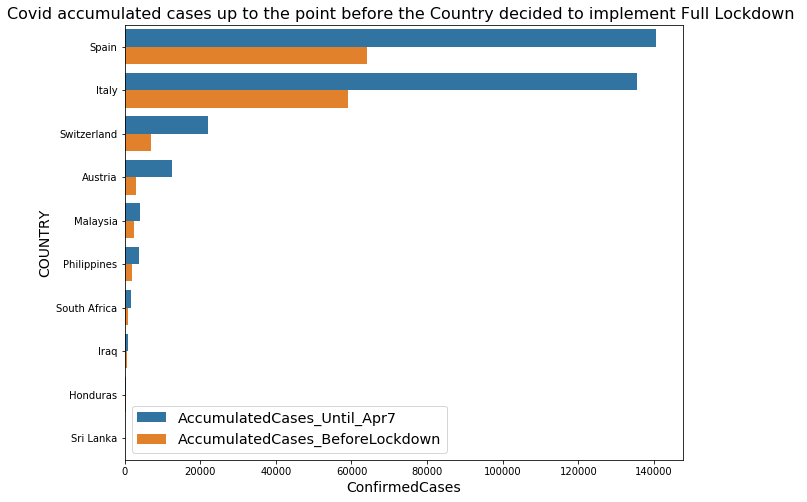

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'ConfirmedCases', 
            y = 'COUNTRY',
            hue = 'Cases',
            data = df.sort_values(by='ConfirmedCases', ascending=False))


plt.xlabel("ConfirmedCases", fontsize = 14)
plt.ylabel("COUNTRY", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Covid accumulated cases up to the point before the Country decided to implement Full Lockdown ', size = 16)
plt.show()

### So it appeared that Italy and Spain already have high accumulated number of Confirmed cases up to the point before they enforced the Full Lockdown. 

## 4) Is Full Lockdown help in flattening the curve from the spike of Covid?


### Plot the graph of Daily New Covid cases for Country adopting Full Lockdown

In [39]:
df_Covid19.set_index('DATE', inplace=True)

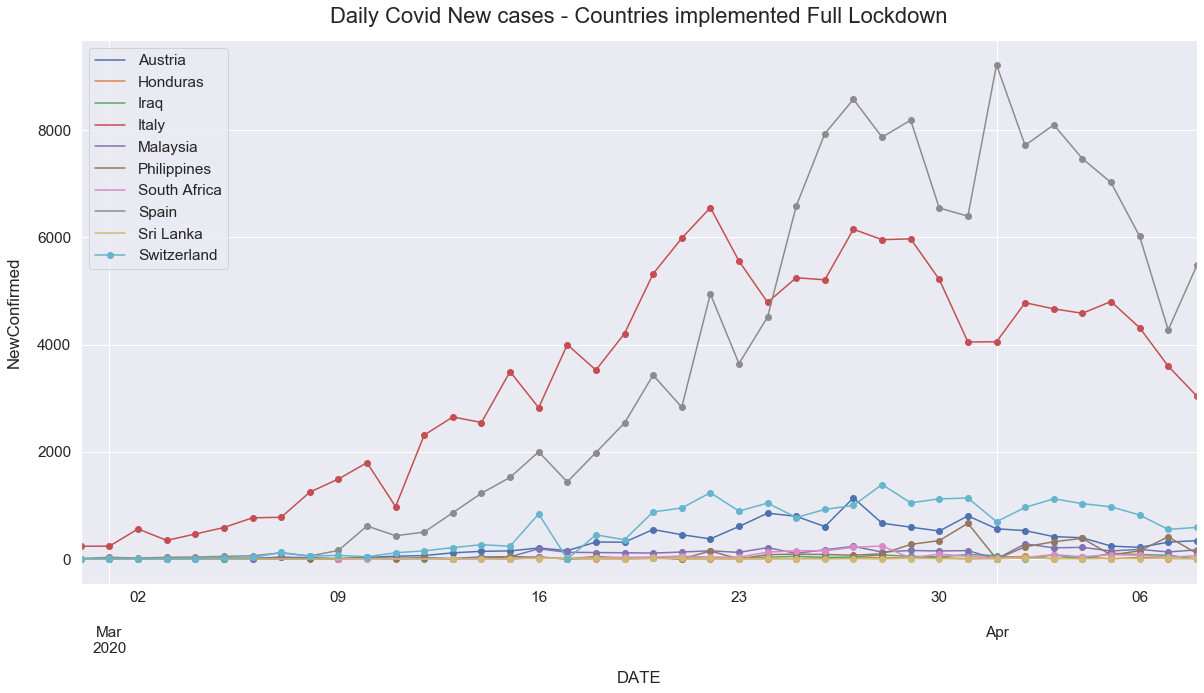

In [40]:
sns.set(font_scale=1.4)
df_Covid19.query("DATE > '2020-02-28'").groupby('COUNTRY')['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)
plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.title("Daily Covid New cases - Countries implemented Full Lockdown", y=1.02, fontsize=22);


### Daily New Covid graph for Italy and a vertical line showing when Full Lockdown is implemented

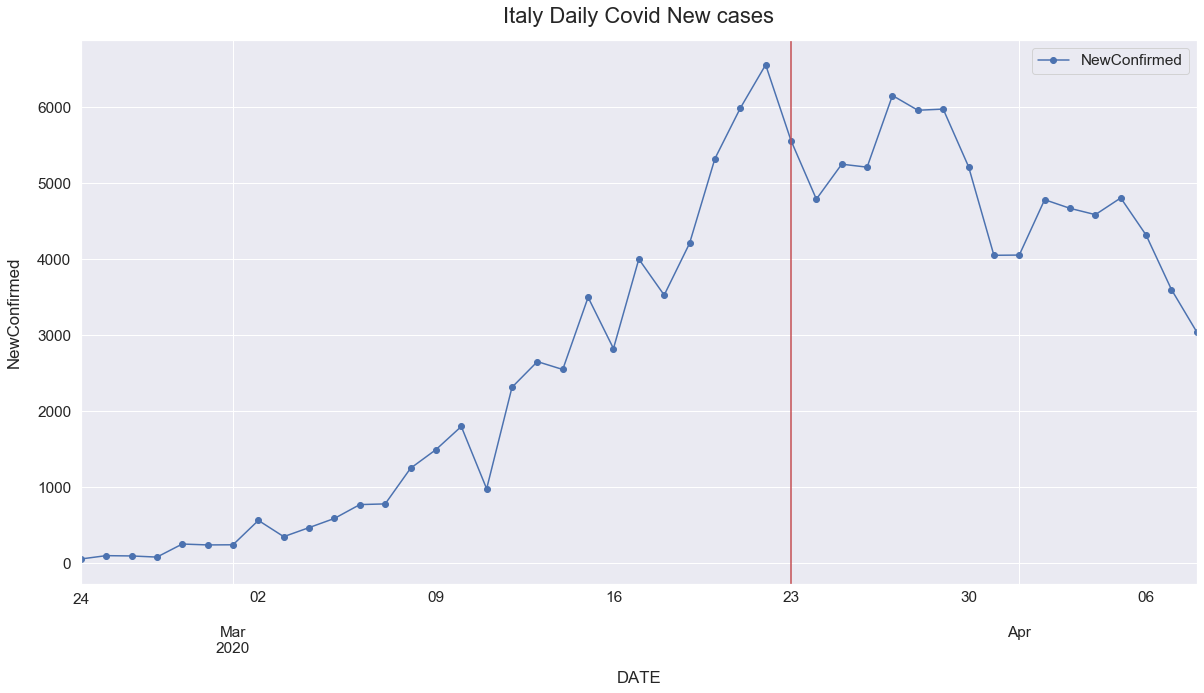

In [41]:
df_Covid19.query("DATE > '2020-02-23' and COUNTRY=='Italy'")['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)
plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.axvline(df_Covid19.query("COUNTRY=='Italy'")['DATE_IMPLEMENTED'].unique(), color='r')
plt.title("Italy Daily Covid New cases", y=1.02, fontsize=22);


### Daily New Covid graph for Spain and a vertical line showing when Full Lockdown is implemented

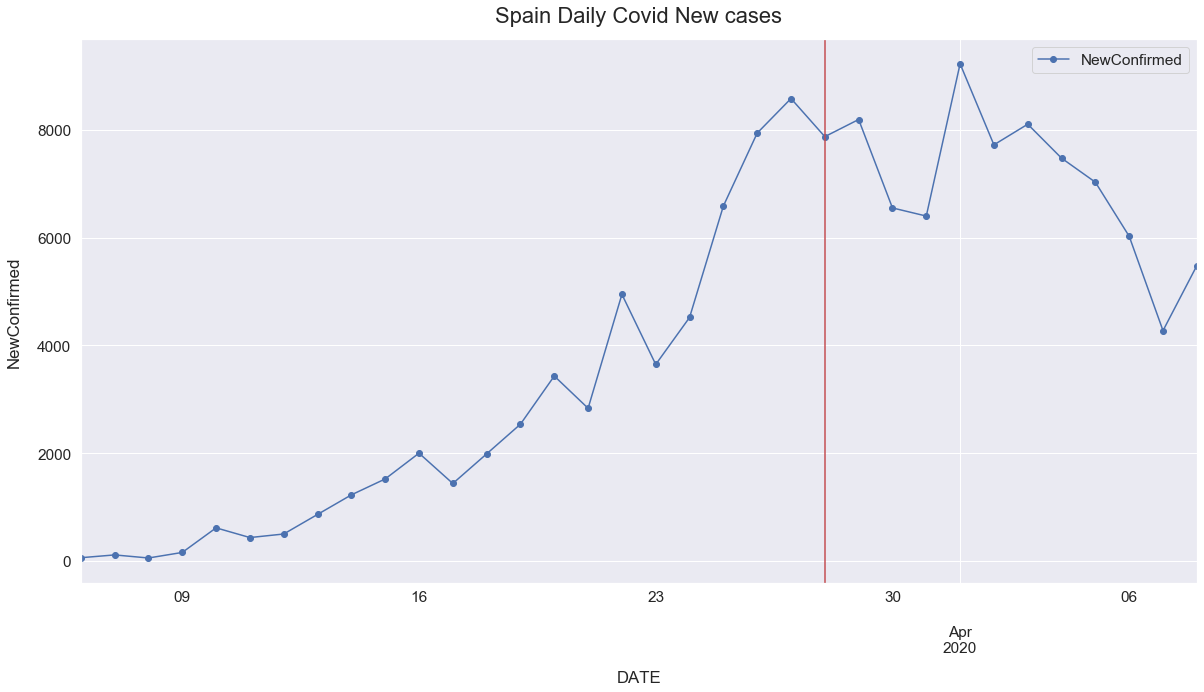

In [42]:
df_Covid19.query("DATE > '2020-03-05' and CountryCode=='ESP'")['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)
plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.axvline(df_Covid19.query("CountryCode=='ESP'")['DATE_IMPLEMENTED'].unique(), color='r')
plt.title("Spain Daily Covid New cases", y=1.02, fontsize=22);

### Daily New Covid graph for Switzerland and a vertical line showing when Full Lockdown is implemented

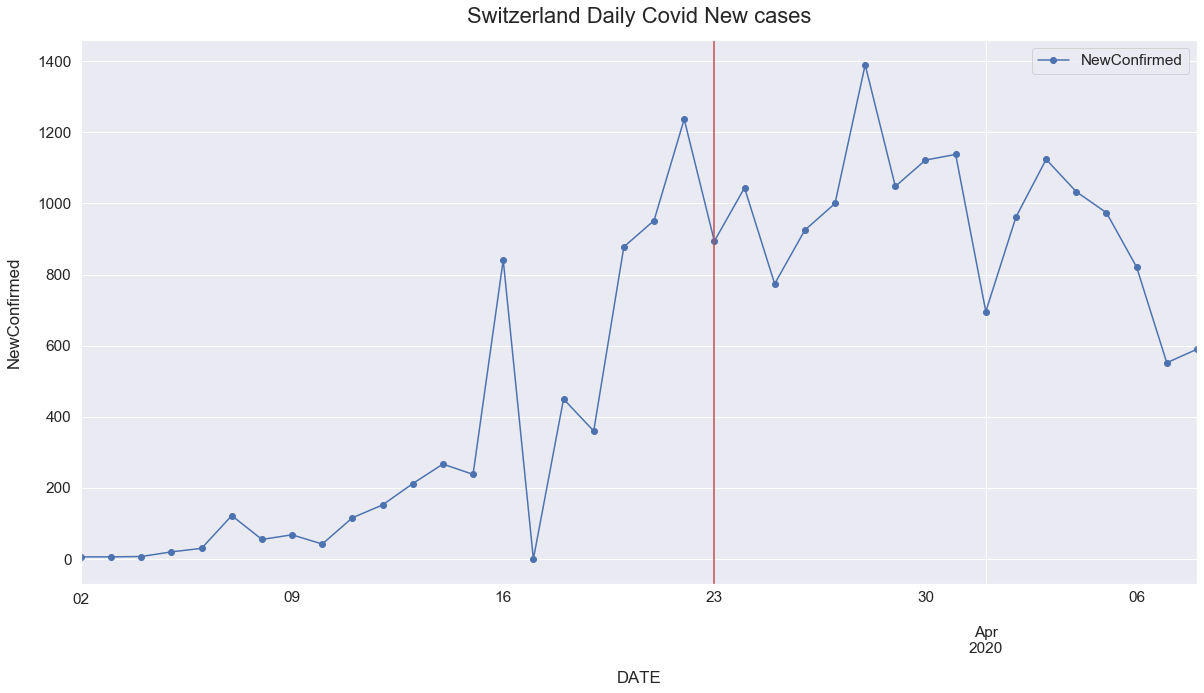

In [43]:
df_Covid19.query("DATE > '2020-03-01' and COUNTRY=='Switzerland'")['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)
plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.axvline(df_Covid19.query("COUNTRY=='Switzerland'")['DATE_IMPLEMENTED'].unique(), color='r')
plt.title("Switzerland Daily Covid New cases", y=1.02, fontsize=22);

### Daily New Covid graph for Austria and a vertical line showing when Full Lockdown is implemented

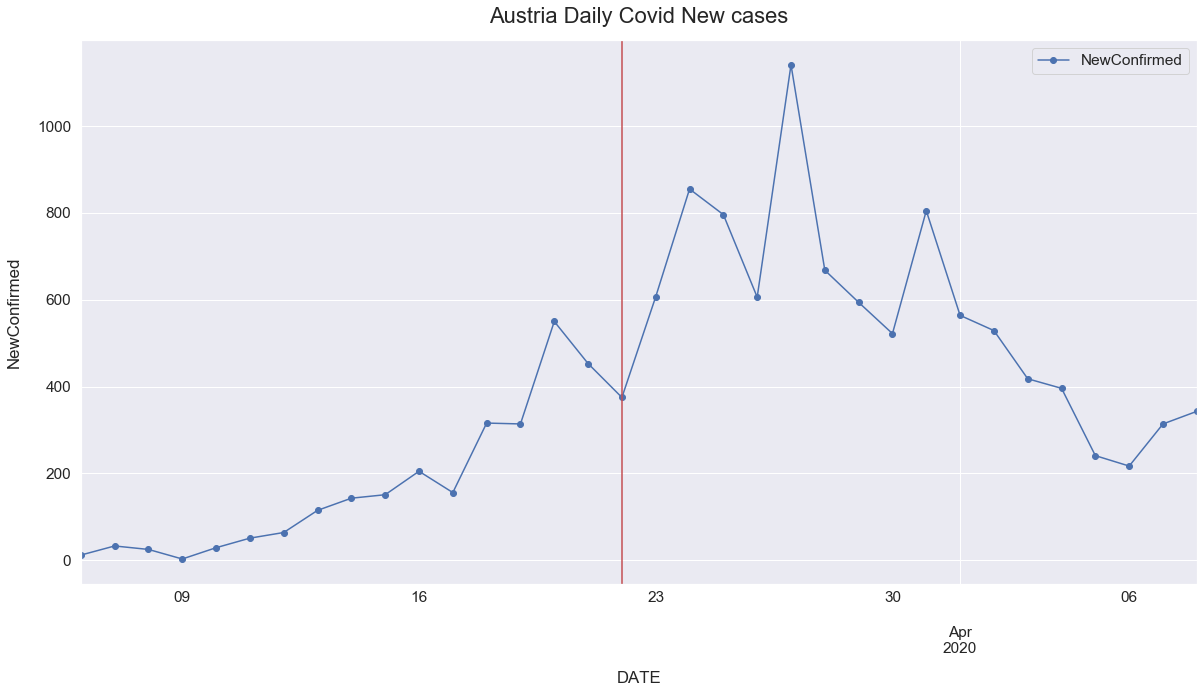

In [44]:
df_Covid19.query("DATE > '2020-03-05' and COUNTRY=='Austria'")['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)
plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.axvline(df_Covid19.query("COUNTRY=='Austria'")['DATE_IMPLEMENTED'].unique(), color='r')
plt.title("Austria Daily Covid New cases", y=1.02, fontsize=22);

### Daily New Covid graph for Malaysia and a vertical line showing when Full Lockdown is implemented

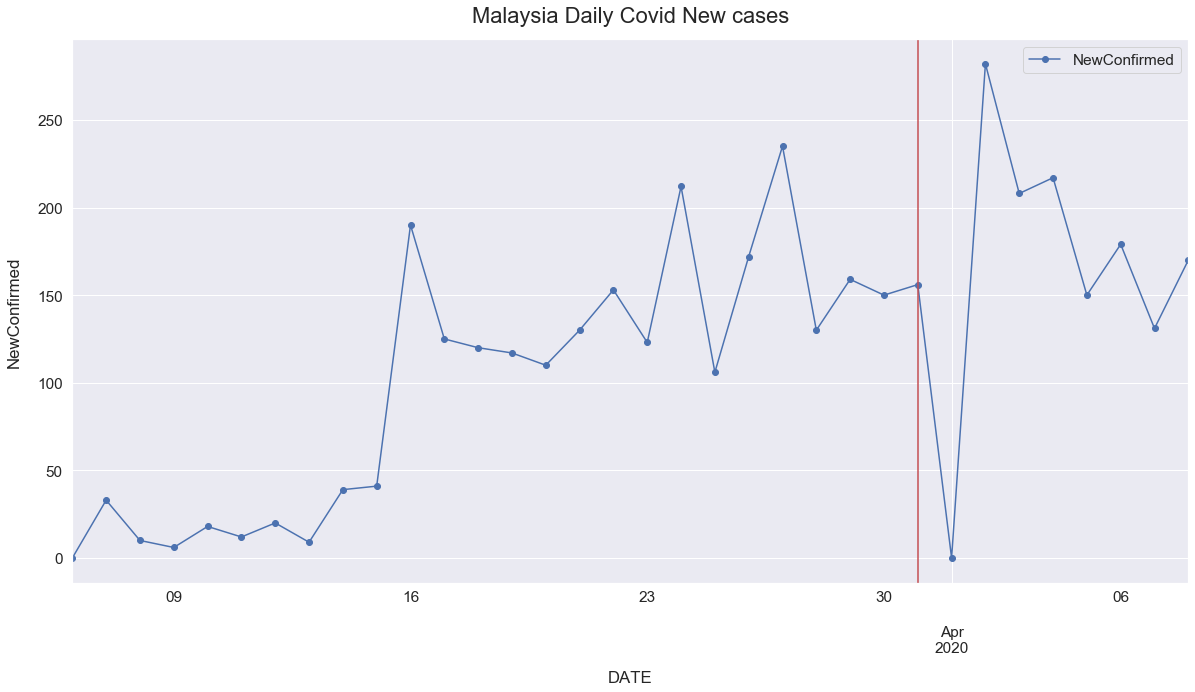

In [45]:
df_Covid19.query("DATE > '2020-03-05' and COUNTRY=='Malaysia'")['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)
plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.axvline(df_Covid19.query("COUNTRY=='Malaysia'")['DATE_IMPLEMENTED'].unique(), color='r')
plt.title("Malaysia Daily Covid New cases", y=1.02, fontsize=22);

####  There is something wrong with the dataset on MYS ConfirmedCases for April 1st. <br> So I did a check. The total accumulated number of Confirmed cases is 2766 on Apr 1 and not 2626 (which is the same number as Mar31). I believed this is due to timezone difference in collecting the data. Hence the daily increment is 140 for Apr 1st (and not zero)


### From the plots, it appeared that Full Lockdown does help in flattening the curve from the spike of Covid. The vertical line served as a point from when the highest stringent Full Lockdown is implemented, from there onwards the spike of Covid looks to be flattened.

## 5) How about countries that do not implement Full Lockdown?

### Out of the top 10 accumulated Confirmed Cases Countries that do not implement full lockdown, we observed that some of those have at least adopted some forms of partial lockdown and movement restrictions. Let's take a look at how they are doing.
Lets look at top 5 Countries with no Full Lockdown implemented 

In [46]:
df_Covid19_NoLockdown = df_OxfordCovid19_NotLockdownC.copy()
df_Covid19_NoLockdown.reset_index(inplace=True)

df_Covid19_NoLockdown['NewConfirmed'] = df_Covid19_NoLockdown.groupby('CountryCode')['ConfirmedCases'].diff()

df_Covid19_NoLockdown.tail()

,CountryName,CountryCode,Date,S1_School closing,S2_Workplace closing,S3_Cancel public events,S4_Close public transport,S5_Public information campaigns,S5_IsGeneral,S6_Restrictions on internal movement,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39,DATE,NewConfirmed
11605,Taiwan,TWN,20200404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355.0,5.0,NaN,38.1,\t,2020-04-04,16.0
11606,Taiwan,TWN,20200405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.0,5.0,NaN,38.1,\t,2020-04-05,8.0
11607,Taiwan,TWN,20200406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.0,5.0,NaN,38.1,\t,2020-04-06,0.0
11608,Taiwan,TWN,20200407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.0,5.0,NaN,38.1,\t,2020-04-07,10.0
11609,Taiwan,TWN,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.0,5.0,NaN,38.1,\t,2020-04-08,3.0


In [47]:
df_Covid19_NoLockdown.sort_values('ConfirmedCases',ascending = False).groupby('CountryCode').head(1)[:10]


,CountryName,CountryCode,Date,S1_School closing,S2_Workplace closing,S3_Cancel public events,S4_Close public transport,S5_Public information campaigns,S5_IsGeneral,S6_Restrictions on internal movement,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39,DATE,NewConfirmed
10971,United States,USA,20200408,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398809.0,12895.0,NaN,66.67,\t,2020-04-08,30613.0
3041,Germany,DEU,20200408,2.0,1.0,2.0,0.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,103228.0,1861.0,80.95,80.95,\t,2020-04-08,4003.0
2324,China,CHN,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82784.0,3337.0,NaN,66.67,\t,2020-04-08,86.0
3769,France,FRA,20200408,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,78167.0,10328.0,95.24,95.24,\t,2020-04-08,3777.0
5006,Iran,IRN,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,62589.0,3872.0,NaN,71.43,\t,2020-04-08,2089.0
3868,United Kingdom,GBR,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55242.0,6159.0,NaN,71.43,\t,2020-04-08,3634.0
10456,Turkey,TUR,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34109.0,725.0,NaN,95.24,\t,2020-04-08,3892.0
915,Belgium,BEL,20200408,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22194.0,2035.0,NaN,85.71,\t,2020-04-08,1380.0
7388,Netherlands,NLD,20200408,2.0,2.0,2.0,0.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,19580.0,2101.0,85.71,85.71,\t,2020-04-08,777.0
2122,Canada,CAN,20200408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17883.0,380.0,NaN,80.95,\t,2020-04-08,1230.0


In [48]:
# Get the list of of Countries not implementing Full Lockdown 
TopNoLockdownCountry = df_Covid19_NoLockdown.sort_values('ConfirmedCases',ascending = False).groupby('CountryCode').head(1)[:10]['CountryCode']
df_TopNoLockdownCountry = pd.DataFrame(TopNoLockdownCountry , columns=["CountryCode"])
list(df_TopNoLockdownCountry["CountryCode"])

['USA', 'DEU', 'CHN', 'FRA', 'IRN', 'GBR', 'TUR', 'BEL', 'NLD', 'CAN']

In [49]:
df_Covid19_NoLockdown.set_index('DATE', inplace=True)

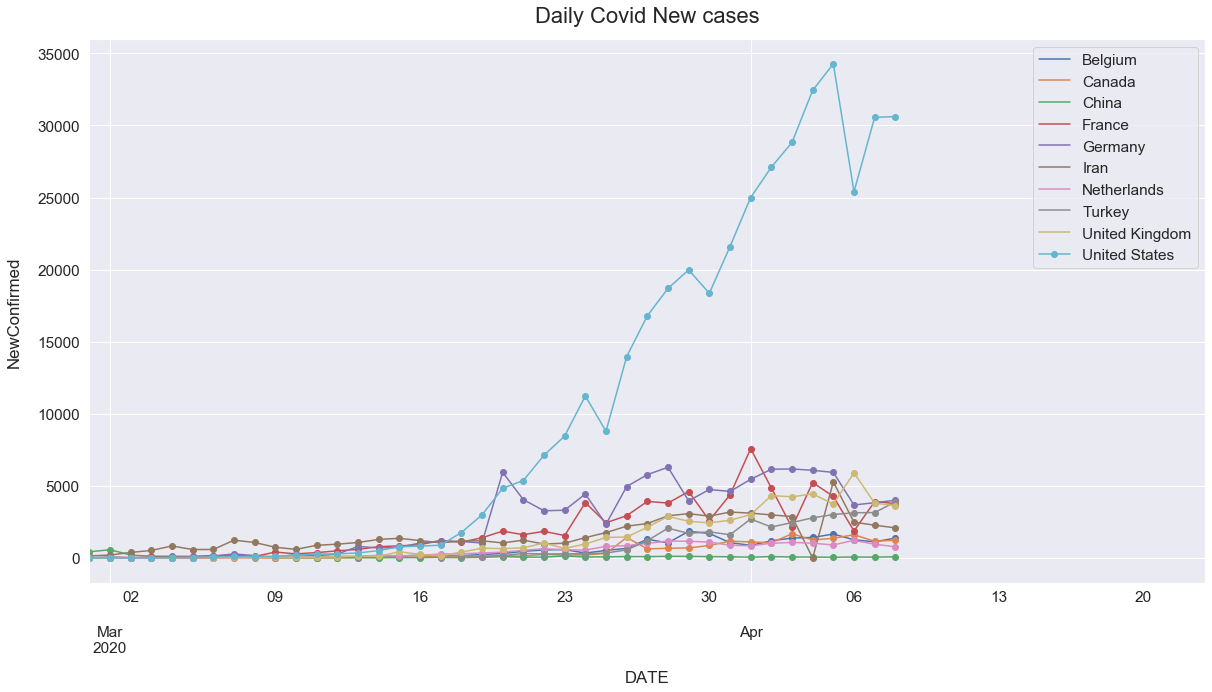

In [50]:
df_Covid19_NoLockdown.query("DATE > '2020-02-28' and (CountryCode == ['USA', 'DEU', 'CHN', 'FRA', 'IRN', 'GBR', 'TUR', 'BEL', 'NLD', 'CAN'])").groupby('CountryName')['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)

plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.title("Daily Covid New cases", y=1.02, fontsize=22);

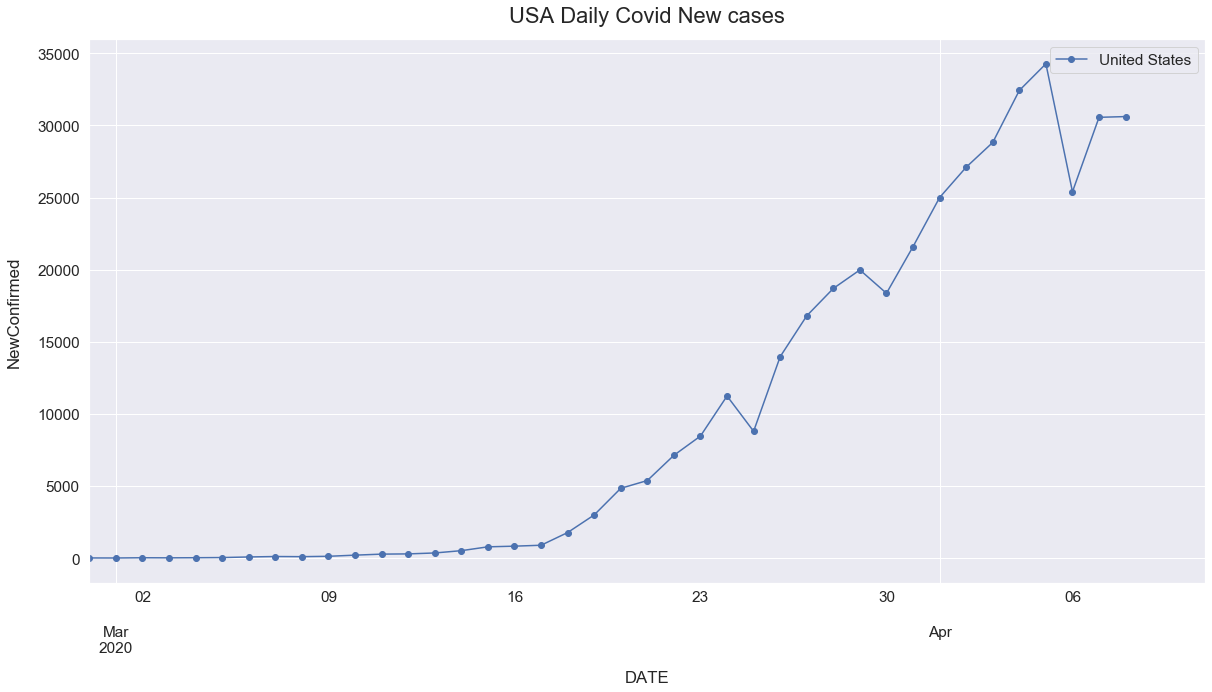

In [51]:

df_Covid19_NoLockdown.query("DATE > '2020-02-28' and (CountryCode == ['USA'])").groupby('CountryName')['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)

plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.title("USA Daily Covid New cases", y=1.02, fontsize=22);

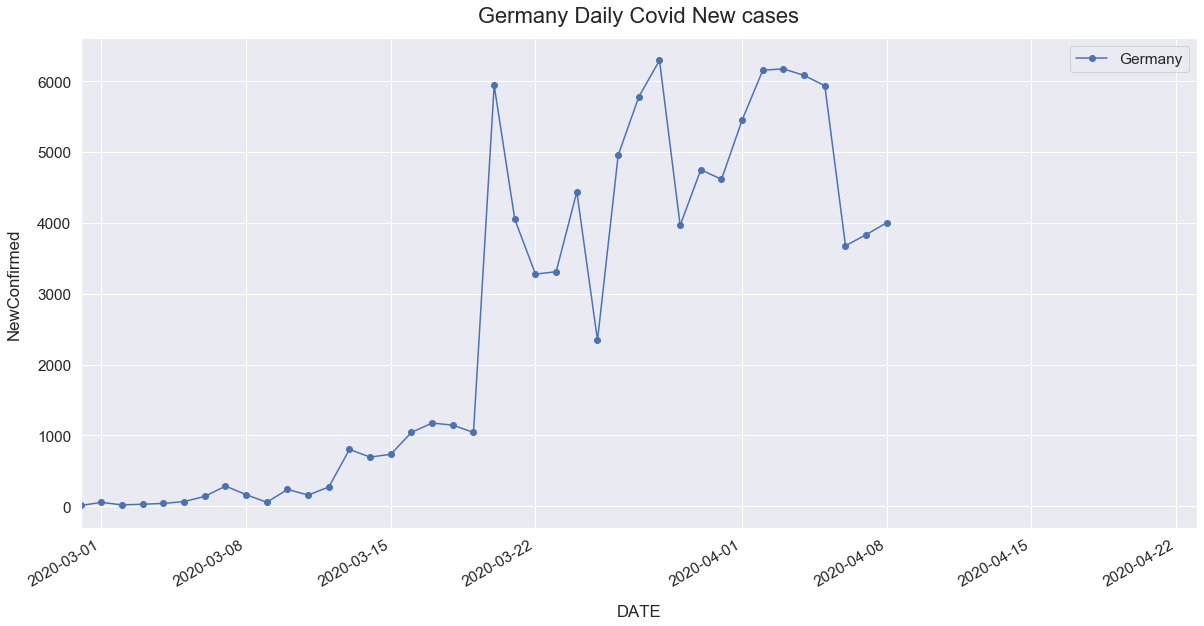

In [52]:
df_Covid19_NoLockdown.query("DATE > '2020-02-28' and (CountryCode == ['DEU'])").groupby('CountryName')['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)

plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.title("Germany Daily Covid New cases", y=1.02, fontsize=22);

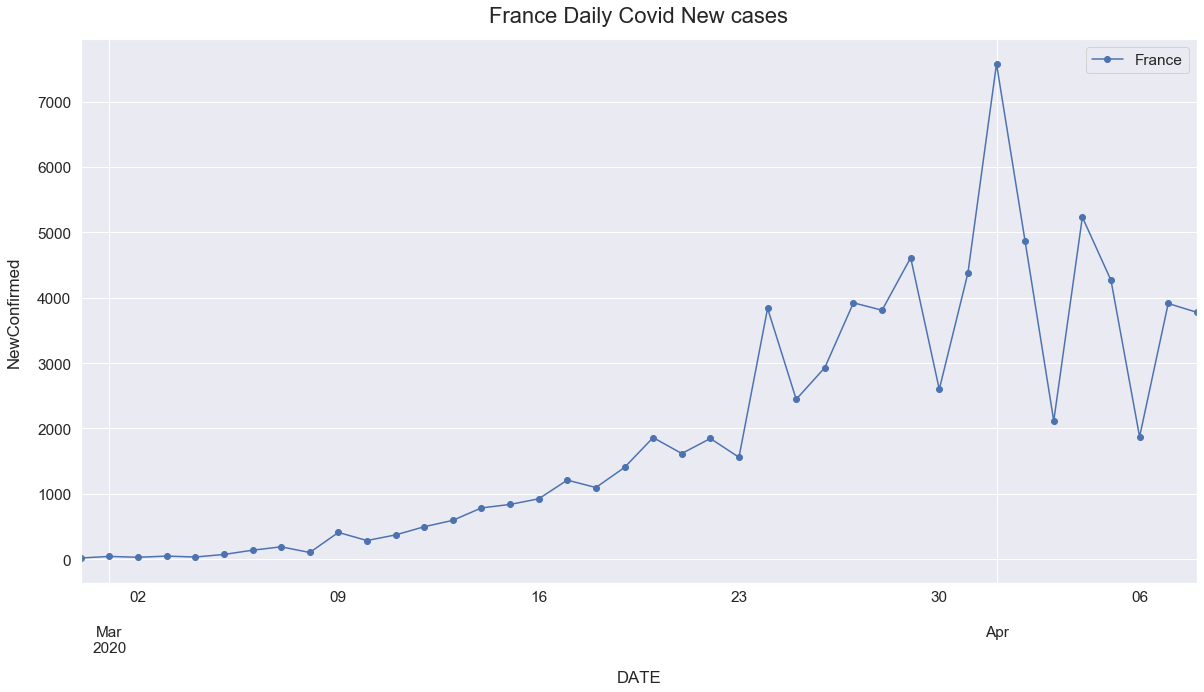

In [53]:
df_Covid19_NoLockdown.query("DATE > '2020-02-28' and (CountryCode == ['FRA'])").groupby('CountryName')['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)

plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.title("France Daily Covid New cases", y=1.02, fontsize=22);

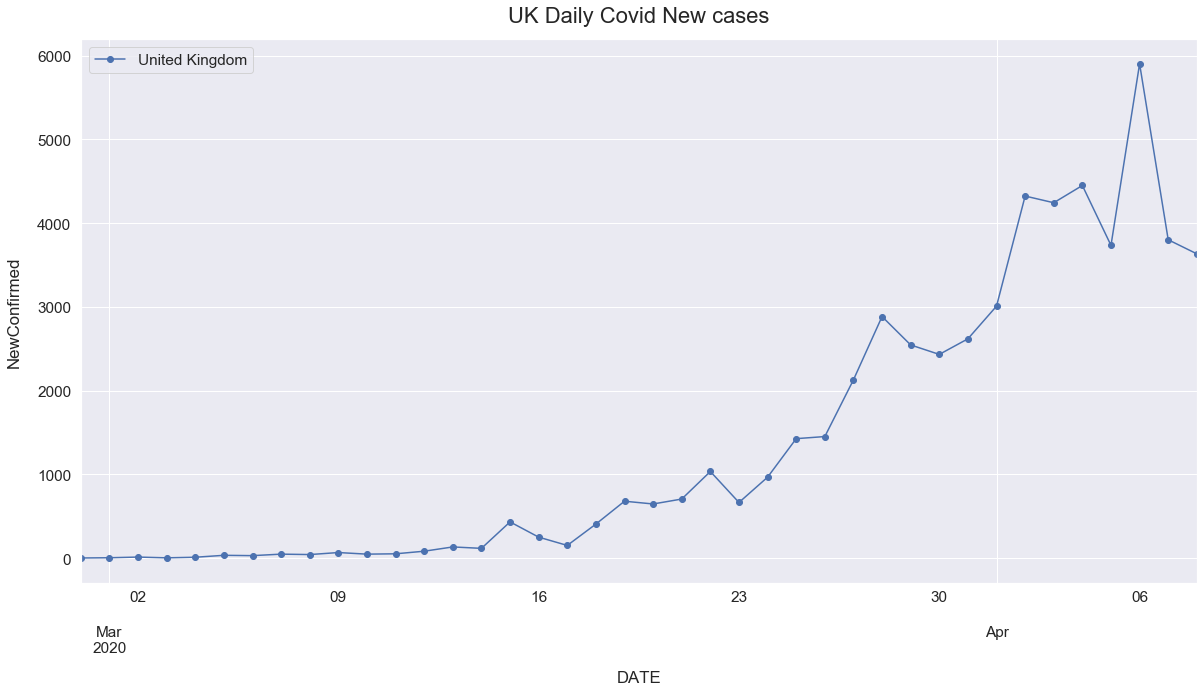

In [54]:
df_Covid19_NoLockdown.query("DATE > '2020-02-28' and (CountryCode == ['GBR'])").groupby('CountryName')['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)

plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.title("UK Daily Covid New cases", y=1.02, fontsize=22);

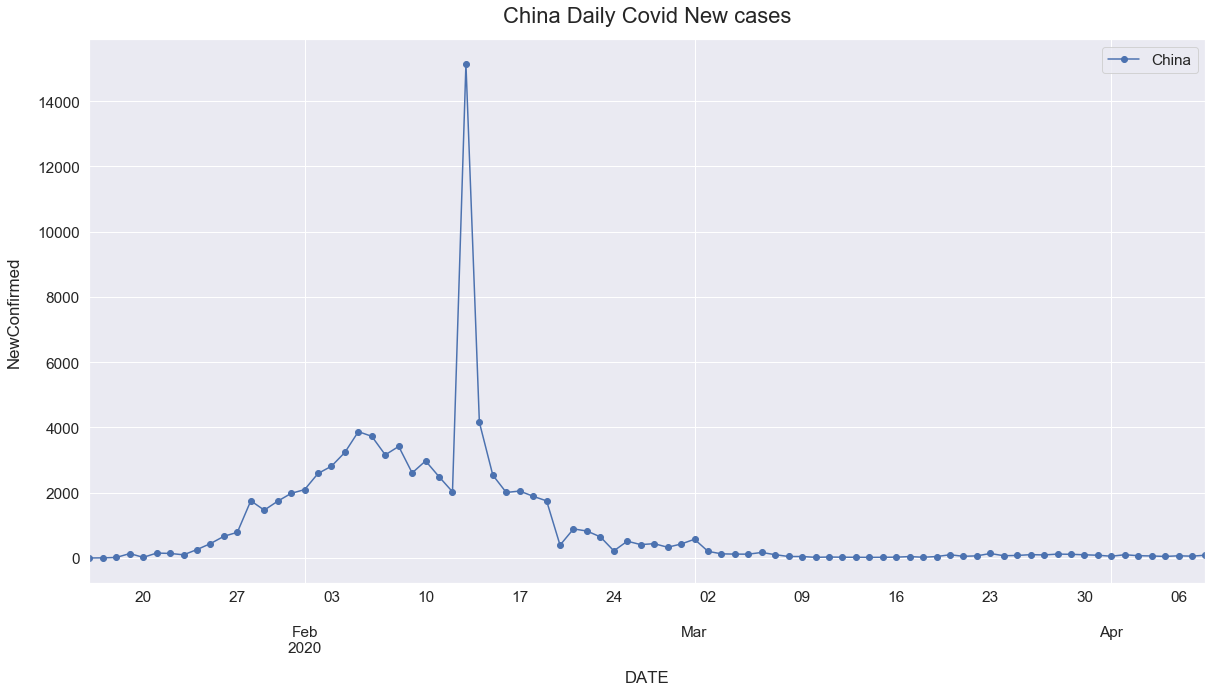

In [55]:
df_Covid19_NoLockdown.query("DATE > '2020-01-15' and (CountryCode == ['CHN'])").groupby('CountryName')['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)

plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.title("China Daily Covid New cases", y=1.02, fontsize=22);

### From the graph, out of the Top 5 Country with no Full Lockdown implemented, looks like Germany has some signs on flattening the curve, China is clearly in downtrend and staying flat, France is uncertain, but UK and USA which doesn't show any convincing sign of slowing down. <br> We will check if these countries implemented any partial lockdown and when. 


In [56]:
PartialLockdownCountry = df_ACAPSCovid19.query("CATEGORY == 'Lockdown' and (MEASURE == 'Partial lockdown') and (CountryCode == ['USA', 'DEU', 'CHN', 'FRA', 'GBR'])")['CountryCode'].unique()
PartialLockdownCountry

array(['CHN', 'FRA', 'DEU', 'GBR'], dtype=object)

In [57]:
df_NoFullLockdown = df_ACAPSCovid19.query("CATEGORY == 'Lockdown' and (MEASURE == 'Partial lockdown')")[['CountryCode','COUNTRY', 'CATEGORY', 'MEASURE', 'COMMENTS', 'DATE_IMPLEMENTED']].sort_values(['CountryCode', 'DATE_IMPLEMENTED'],ascending = [True, True])
df_NoFullLockdown  = df_NoFullLockdown.sort_values('DATE_IMPLEMENTED',ascending = False).groupby('CountryCode').head(1)

# We does not need the comments column anymore since we have determinted the last implemented date for the highest stringent Partial Lockdown for a  country. 
df_NoFullLockdown  = df_NoFullLockdown [['CountryCode','COUNTRY', 'CATEGORY', 'MEASURE','DATE_IMPLEMENTED']].sort_values(['CountryCode', 'DATE_IMPLEMENTED'],ascending = [True, True])

df_NoFullLockdown.loc[df_NoFullLockdown['CountryCode'].isin(['CHN', 'FRA', 'DEU', 'GBR'])]

,CountryCode,COUNTRY,CATEGORY,MEASURE,DATE_IMPLEMENTED
732,CHN,China,Lockdown,Partial lockdown,NaT
1432,DEU,Germany,Lockdown,Partial lockdown,2020-03-21
1340,FRA,France,Lockdown,Partial lockdown,2020-03-17
4007,GBR,United Kingdom,Lockdown,Partial lockdown,2020-03-24


In [58]:
df_Covid19_NoLockdown.reset_index(inplace=True)

In [59]:
df_Covid19_NoFullLockdown = pd.merge(df_Covid19_NoLockdown, df_NoFullLockdown, how='left', on=['CountryCode'])
df_Covid19_NoFullLockdown

,DATE,CountryName,CountryCode,Date,S1_School closing,S2_Workplace closing,S3_Cancel public events,S4_Close public transport,S5_Public information campaigns,S5_IsGeneral,S6_Restrictions on internal movement,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,S12_Testing framework,S13_Contact tracing,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39,NewConfirmed,COUNTRY,CATEGORY,MEASURE,DATE_IMPLEMENTED
0,2020-01-01,Aruba,ABW,20200101,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t,NaN,NaN,NaN,NaN,NaT
1,2020-01-02,Aruba,ABW,20200102,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t,NaN,NaN,NaN,NaN,NaT
2,2020-01-03,Aruba,ABW,20200103,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t,NaN,NaN,NaN,NaN,NaT
3,2020-01-04,Aruba,ABW,20200104,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t,NaN,NaN,NaN,NaN,NaT
4,2020-01-05,Aruba,ABW,20200105,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,\t,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11605,2020-04-04,Taiwan,TWN,20200404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355.0,5.0,NaN,38.1,\t,16.0,NaN,NaN,NaN,NaT
11606,2020-04-05,Taiwan,TWN,20200405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.0,5.0,NaN,38.1,\t,8.0,NaN,NaN,NaN,NaT
11607,2020-04-06,Taiwan,TWN,20200406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.0,5.0,NaN,38.1,\t,0.0,NaN,NaN,NaN,NaT
11608,2020-04-07,Taiwan,TWN,20200407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.0,5.0,NaN,38.1,\t,10.0,NaN,NaN,NaN,NaT


In [60]:
df_Covid19_NoFullLockdown['NewConfirmed'].isnull().mean()
df_Covid19_NoFullLockdown = df_Covid19_NoFullLockdown.dropna(subset=['NewConfirmed'],  how='any')
df_Covid19_NoFullLockdown['NewConfirmed'].isnull().mean()

0.0

In [61]:
df_Covid19_NoFullLockdown.set_index('DATE', inplace=True)

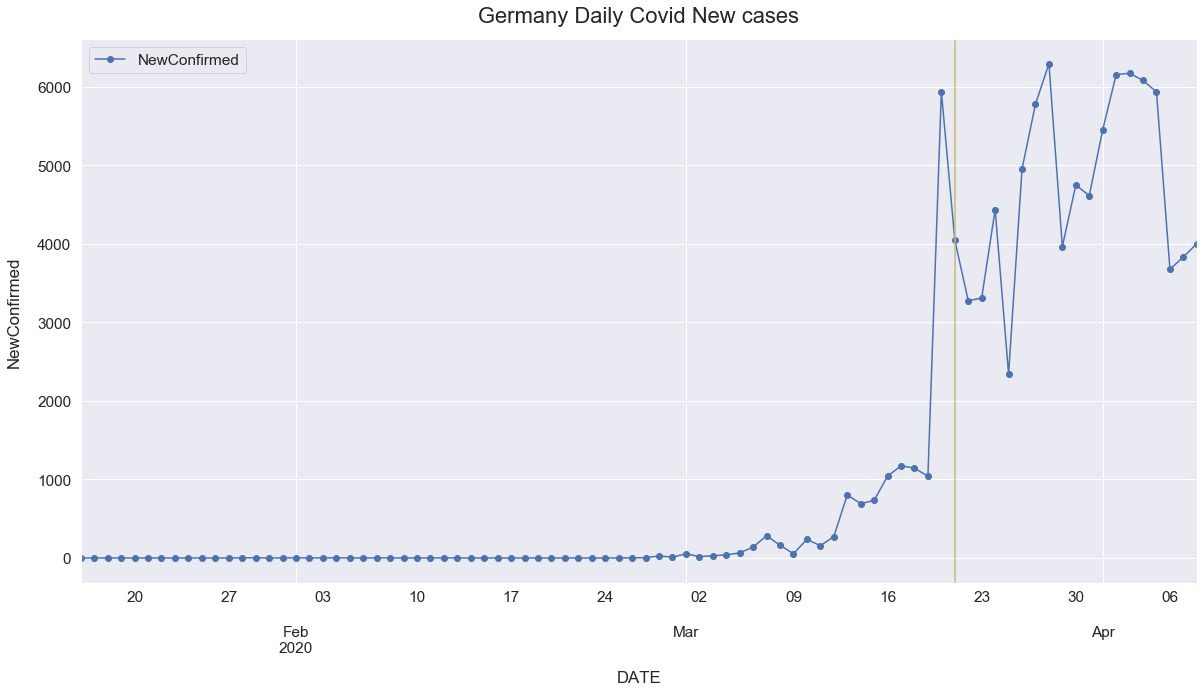

In [62]:
df_Covid19_NoFullLockdown.query("DATE > '2020-01-15' and COUNTRY=='Germany'")['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)
plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.axvline(df_Covid19_NoFullLockdown.query("COUNTRY=='Germany'")['DATE_IMPLEMENTED'].unique(), color='y')
plt.title("Germany Daily Covid New cases", y=1.02, fontsize=22);


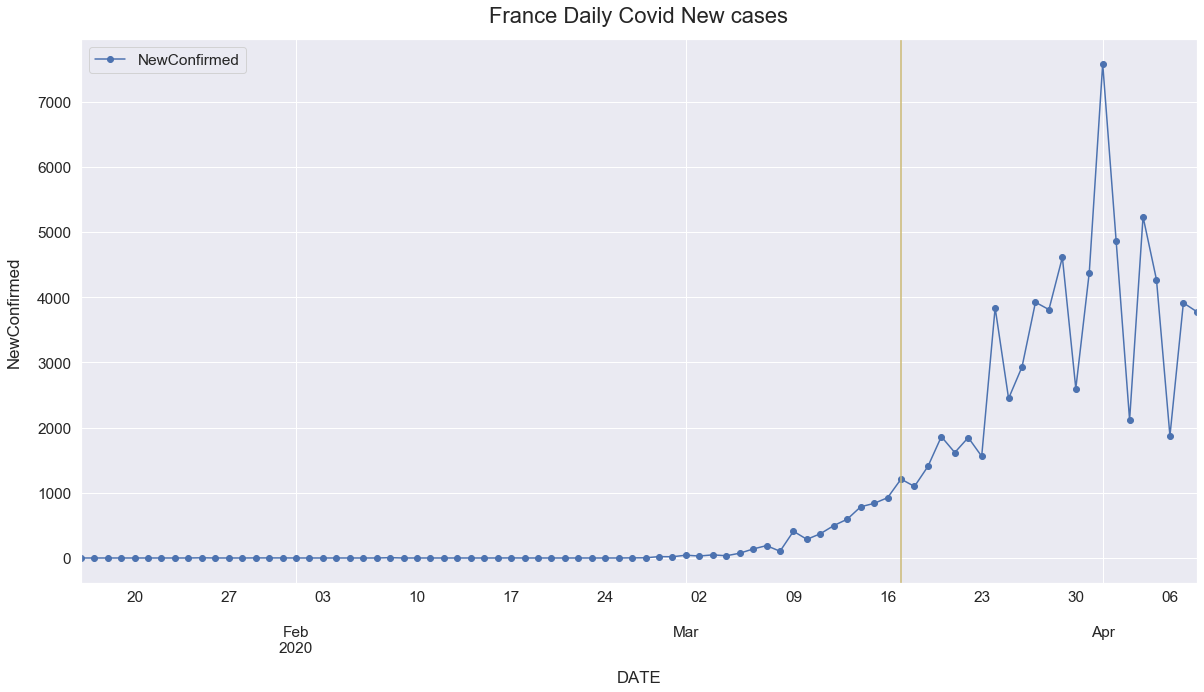

In [63]:
df_Covid19_NoFullLockdown.query("DATE > '2020-01-15' and COUNTRY=='France'")['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)
plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.axvline(df_Covid19_NoFullLockdown.query("COUNTRY=='France'")['DATE_IMPLEMENTED'].unique(), color='y')
plt.title("France Daily Covid New cases", y=1.02, fontsize=22);


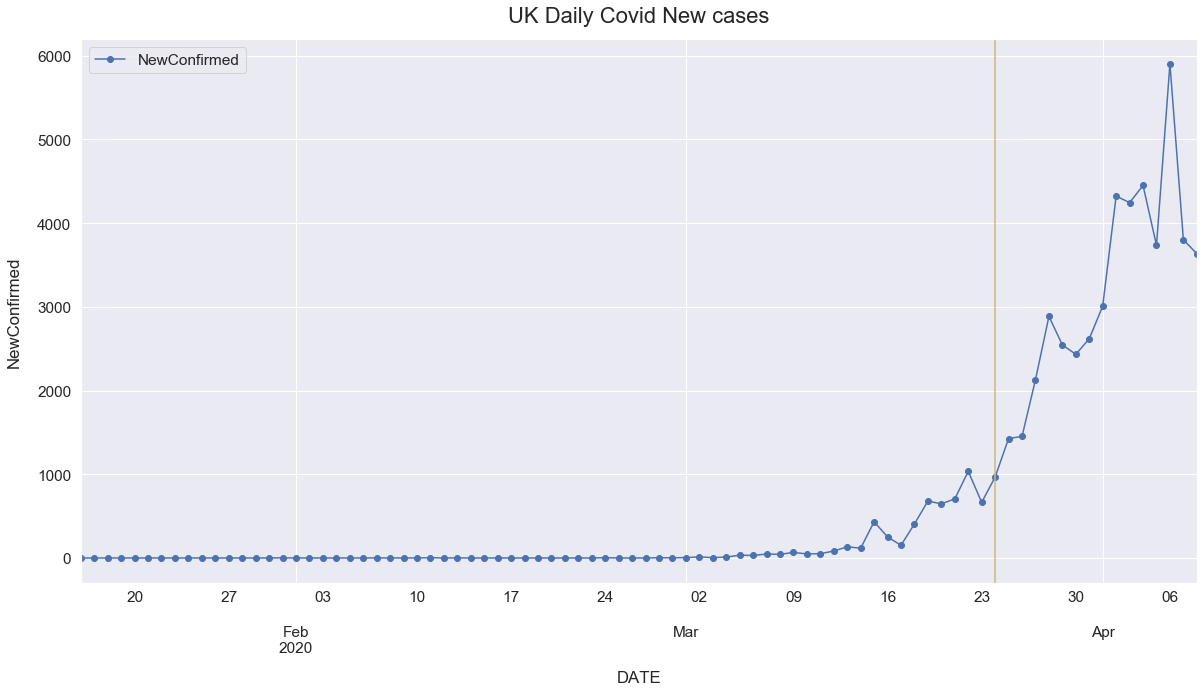

In [64]:
df_Covid19_NoFullLockdown.query("DATE > '2020-01-15' and COUNTRY=='United Kingdom'")['NewConfirmed'].plot(legend=True, figsize=(20, 10), marker='o', linewidth=1.5)
plt.xlabel("DATE", labelpad=15)
plt.ylabel("NewConfirmed", labelpad=15)
plt.axvline(df_Covid19_NoFullLockdown.query("COUNTRY=='United Kingdom'")['DATE_IMPLEMENTED'].unique(), color='y')
plt.title("UK Daily Covid New cases", y=1.02, fontsize=22);


### The results are mix for countries which practiced partial Lockdown. For Germany, it seems that partial lockdown has helped in flattening the curve. China did tremendously well with its 'partial' lockdown. However, France and UK dooesn't seems that convincing. US is continued on the rise.


## Conclusion

In this workbook, we identify that there are 6 main types of actions taken by different nations in controlling the spread of Covid 19. Throughout this notebook, we would like to explored whether 'Full Lockdown' is effective in controlling the spread. <br> <br> 

We identified the Top 10 countries (with highest accumulated Confirmed cases) which implemented Full Lockdown (e.g. 
Spain, Italy, Switzerland, Austria, Malaysia) against the Top 10 countries which do not implement Full Lockdown / adopted Partial Lockdown (e.g. USA, Germany, France, China, UK). <br> <br>

We found out from the Pareto that the top 10 Countries (except Spain & Italy) that implemented Full Lockdown have lower accumulated Confirmed Cases as compared to the top 10 Countries that do not implement Full Lockdown.  <br> <br>

In the attempts to answer why Italy and Spain have high accumulated confirmed cases even with Full Lockdown, a side-by-side plot showed that Italy and Spain already have high accumulated number of Confirmed cases before they enforced the Full Lockdown.  <br> <br>

The results are mix for countries which do not implement Full Lockdown or implemented partial lockdown. <br><br>

From our analysis, it appeared that Full Lockdown is effective in controlling the spread of Covid-19 but only from the point where the highest stringent Full Lockdown is executed. <br> <br>




    
